# 201810803 장서령

### 문제1: 회귀분석



데이터를 생성하고 다음을 푸세요.



```

from sklearn.datasets import make_regression

X, y, coef = make_regression(n_samples = 100,n_features = 4,n_informative = 3,n_targets = 1,noise = 0.0, coef = True) ... [식-1]

```

In [0]:
import os
import pyspark
os.environ["PYSPARK_PYTHON"]="/usr/bin/python3"
os.environ["PYSPARK_DRIVER_PYTHON"]="/usr/bin/python3"
myConf=pyspark.SparkConf()
spark=pyspark.sql.SparkSession.builder.master("local").appName("myApp").config(conf=myConf).getOrCreate()

* (1-1) gradient 방법으로 회귀식을 계산하고, 결과를 [식-1]의 coef와 비교하세요.

주의: 반복이 많으면 감점 (예를 들어, 1000 이상이면 많다고 간주할 것임)

In [0]:
# 데이터 생성
from sklearn.datasets import make_regression
X, y, coef = make_regression(n_samples = 100,n_features = 4,n_informative = 3, n_targets = 1,noise = 0.0,coef = True)

In [0]:
import random

def computeAvgError(a,b,X,y):
    totalError = 0
    for i in range(0, len(X)):
        totalError += (y[i] - (a + b* X[i])) ** 2
    return totalError / float(len(X))

#x: attribute, 1d float array or list
#y: class, 1d int array
#alpha: learning rate
def gradientDescentL(X,y,alpha,iter):
    a=random.random()
    b=random.random()
    #alpha=0.01
    n=len(X)
    for j in range(iter):
        aGradient = 0
        bGradient = 0
        for i in range(n):
            aGradient += (2./n) * (((a + b * X[i])) - y[i])*(1)
            bGradient += (2./n) * (((a + b * X[i])) - y[i])*(X[i])
        a = a - (alpha * aGradient)
        b = b - (alpha * bGradient)
        if (j%100==0):
            print ("iter:{0} a={1:.3f} b={2:.3f} AvgError={3:.3f}".format(j,a,b,computeAvgError(a,b,X,y)))
    return a, b

In [0]:
alpha = 0.01
a,b,c,d=gradientDescentL(X,y,alpha,100)

--------------------------------------------------------------------------- 
 TypeError Traceback (most recent call last)
 <command-3429598538558618> in <module> 
 1 alpha = 0.01 
 ----> 2 a , b , c , d = gradientDescentL ( X , y , alpha , 100 ) 

 <command-3429598538558616> in gradientDescentL (X, y, alpha, iter) 
 24 b = b - ( alpha * bGradient ) 
 25 if ( j % 100 == 0 ) : 
 ---> 26 print ( "iter:{0} a={1:.3f} b={2:.3f} AvgError={3:.3f}" . format ( j , a , b , computeAvgError ( a , b , X , y ) ) ) 
 27 return a , b

 TypeError : unsupported format string passed to numpy.ndarray.__format__

In [0]:
print("---> a={0}, b={1}, c={2}, d={3} after iterations".format(a,b,c,d))

--------------------------------------------------------------------------- 
 NameError Traceback (most recent call last)
 <command-3429598538558620> in <module> 
 ----> 1 print ( "---> a={0}, b={1}, c={2}, d={3} after iterations" . format ( a , b , c , d ) ) 

 NameError : name 'a' is not defined

In [0]:
coef

Out[477]: array([16.74557121, 62.73605735, 23.77177393, 0. ])

* (1-2) Spark DataFrame을 생성 (이후 계속 Spark로 푸세요)

* (1-3-1) 이상값은 표준편차가 3 sigma, -3 ~ 3이 아닌 경우를 말한다. 이상 값을 계산하고 출력.

### 1-2, 1-3-1, 1-3-2, 1-4-1, 1-4-2,1-5 못품

### 문제2: 클러스터링
make_blobs() 함수로, 데이터 200개, 클러스터 5개, 표준편차는 0.5로 설정해서 데이터를 생성하고 다음을 푸세요.

* (2-1) 강의코드 cluster() 함수를 수정해서 클러스터 즁심점을 계산하여 출력하세요. 함수를 수정하여 **반복횟수와 중심값만**을 출력한다.
* (2-2) 반복마다 데이터산포와 중심점 (빨간색)을 그려서, 중심점이 올바르게 이동해 가는 것을 알 수 있게 하세요.

In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [0]:
# 거리를 계산하는 함수 생성
def normDist(x1, x2):
    #dist=np.sqrt(sum(np.power(x1 - x2, 2))) #36.406001444695193
    dist = np.linalg.norm(x1 - x2) #36.406001444695193
    return dist

In [0]:
# 그래프를 그리는 함수 생성
def draw(x, centroids):
    plt.scatter(x[:,0], x[:,1], color='blue')
    plt.scatter(centroids[:,0], centroids[:,1], color='red')
    plt.show()

In [0]:
# 클러스터링 함수 생성
def cluster(x, k, centroids):
    row, col = x.shape
    clusterAssigned = np.zeros(shape=(row, 2), dtype=float)
    # print (clusterAssigned)
    clusterUpdated=True
    iter = 1
    while(clusterUpdated):
        print ("\n\n====== Iteration {} ======".format(iter))
        
        # STEP 1: 할당하기
        for i in range(row):
            minDist = np.inf   # set arbitray max to minDist
            minIndex = -1      # set arbitray index to minIndex
            # compute distance and assign to closer cluster
            for j in range(k):
                # distance from centroids[j] to x[0]
                distJI = normDist(centroids[j], x[i])
                if distJI < minDist:
                    minDist = distJI
                    minIndex = j
            # print (".....Assigning {} to {}th centroid by {:.3f}".format(x[i], minIndex, minDist)) --- 주석
            clusterAssigned[i] = [minIndex, minDist]   #-----changed
        # print ("\n.....Assigned clusters: \n {}".format(clusterAssigned))  --- 주석
        
        # STEP 2: 중심점 갱신하기
        _centroids=np.zeros(shape = (k, x.shape[1]), dtype=float)
        for cent in range(k):
            _centroids[cent] = np.mean(x[clusterAssigned[:,0]==cent],axis=0)
        
        # STEP 3: 중심점 갱신 여부에 대해 판단하기
        comparison = np.equal(centroids, _centroids) # np.isclose() in case some tolerence is required
        if(comparison.all() == True):
            print ("\n.....NOT Updating Centroids\n {} => \n{}".format(centroids, _centroids))
            clusterUpdated = False
            draw(x, centroids) # 그래프 그리기
            return centroids, clusterAssigned
        else:
            print ("\n.....Updating Centroids\n {} => \n{}".format(centroids, _centroids))
            centroids = _centroids
            draw(x, centroids)  # 그래프 그리기
            iter += 1

### 2-1, 2-2 답

====== Iteration 1 ======

.....Updating Centroids
 [[-1.5 8. ]
 [-1.5 3. ]
 [ 1. 4. ]
 [ 2. 1. ]
 [ 9. -2. ]] => 
[[-1.36754522 7.89153496]
 [-1.5435162 2.81345511]
 [ 0.91482275 4.28033686]
 [ 2.05487327 1.11105683]
 [ 9.21059989 -2.47392331]]

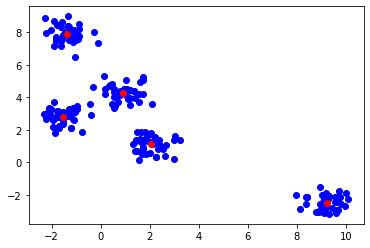

====== Iteration 2 ======

.....NOT Updating Centroids
 [[-1.36754522 7.89153496]
 [-1.5435162 2.81345511]
 [ 0.91482275 4.28033686]
 [ 2.05487327 1.11105683]
 [ 9.21059989 -2.47392331]] => 
[[-1.36754522 7.89153496]
 [-1.5435162 2.81345511]
 [ 0.91482275 4.28033686]
 [ 2.05487327 1.11105683]
 [ 9.21059989 -2.47392331]]

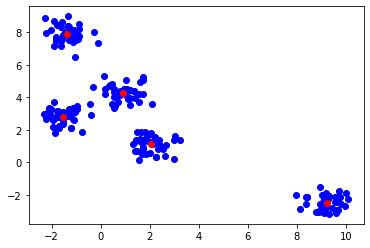

----------------------------------------------------------------------------
The final centroids graph is..

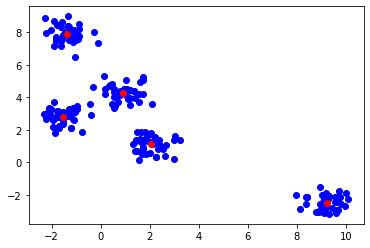

In [0]:
# 반복횟수와 중심점만 출력하기
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=200, centers=5, cluster_std=0.5, random_state=0)
# k와 centroids의 개수는 같다. 
k = 5
centroids = np.array([[-1.5,8],[-1.5,3.0],[1,4],[2,1],[9,-2]], dtype = float)
centroids, clusterAssigned = cluster(X, k, centroids)
print("----------------------------------------------------------------------------")
print('The final centroids graph is..')
# 그래프 출력하기
draw(X, centroids)

* (2-3) Spark DataFrame을 생성하여 클러스터링을 실행하고, 중심점이 (2-1), make_blob()과 동일한지 비교하세요.

In [0]:
# Spark DataFrame 생성하기
import numpy as np
x = np.array(X, dtype = float)

In [0]:
_xRdd = spark.sparkContext.parallelize(x)
xRdd = _xRdd.map(lambda x: [float(i) for i in x])

In [0]:
xDf = xRdd.toDF(["x", "y"])
# xDf.show()

In [0]:
from pyspark.ml.feature import VectorAssembler
va = VectorAssembler(inputCols=["x","y"],outputCol="features")

In [0]:
xxDf = va.transform(xDf)
xxDf.printSchema()
xxDf.show(5)

root
-- x: double (nullable = true)
-- y: double (nullable = true)
-- features: vector (nullable = true)

+-------------------+------------------+--------------------+
 x| y| features|
+-------------------+------------------+--------------------+
 1.7079835915671953|0.8228463897741014|[1.70798359156719...|
-2.2635980086368974| 8.867706446321254|[-2.2635980086368...|
 0.7826066698425189| 4.152635952160722|[0.78260666984251...|
-1.1109975958841805| 7.39000247414383|[-1.1109975958841...|
 2.2434802870106925|0.3479632646458396|[2.24348028701069...|
+-------------------+------------------+--------------------+
only showing top 5 rows

In [0]:
# kMeans clustering
from pyspark.ml.clustering import KMeans
kmeans = KMeans(k=5)

### 2-3답

In [0]:
model = kmeans.fit(xxDf)
print ('The Centroids Based on Spark DataFrame is ... ')
print (model.clusterCenters())
print ('\n The centroids is ...')
print (centroids)

The Centroids Based on Spark DataFrame is ... 
[array([ 9.21059989, -2.47392331]), array([-1.36754522, 7.89153496]), array([2.05487327, 1.11105683]), array([0.91482275, 4.28033686]), array([-1.5435162 , 2.81345511])]

 The centroids is ...
[[-1.36754522 7.89153496]
 [-1.5435162 2.81345511]
 [ 0.91482275 4.28033686]
 [ 2.05487327 1.11105683]
 [ 9.21059989 -2.47392331]]

### 문제3: 텍스트 분류
다음은 축구, 야구 관련 기사에서 발췌한 내용이다. 

읽어보면, 축구인지 야구인지 내용을 식별할 수 있다.

* (3-1) 기사파일을 작성한 후, 파일에서 DataFrame 생성

    * 파일을 작성할 때는 편리한 에디터를 사용해서, 텍스트를 레이블과 함께 저장한다.

    * 파일로 작성하지 못할 경우, 리스트를 사용할 수 있다. (단, 리스트를 사용하면 '파일작성' 부분을 감점함).

    즉, 파일을 못 만들었다고, 다음 문제를 전부 포기하지 말라는 의미입니다.

    * 블릿을 하나의 문서로 간주하세요. 여러 문장이 하나의 문서가 될 수 있어요.

    * 문자열에 컴마가 섞여 있을 수가 있다는 점에 주의하자.

### 3-1 답

In [0]:
df = spark.createDataFrame(
    [
      [0,u'페널티킥 내준 상황에 대해선 "여러 나라를 가봤지만 우리나라 심판 수준에 대해 아쉽다. 앞으로 그런 부분이 나오면 안 될 듯하다"라고 아쉬움을 드러냈다.'],
      [0,u'찬스를 놓치고 페널티킥을 내준 상황에 대해 "선수들은 최고의 경기를 보여줬다"고 생각한다.'],
      [0,u'수원은 후반 막판 공격 상황에서 상대의 반칙이 있었다는 판단에 따라 온필드 리뷰로 페널티킥을 얻었다. 이를 안병준이 침착하게 성공시키며 기적 같은 승격에 성공했다.'],
      [0,u'주심은 VAR 끝에 페널티 킥을 선언했고, 키커로 나선 안병준이 침착하게 차넣어 득점에 성공했다.'],
      [0,u'전반 11분 박스 안에서 유려한 드리블 돌파를 선보이며 카일 워커의 페널티킥을 이끌어냈다. 모하메드 살라가 키커로 나서 선제골로 마무리했다.'],
      [0,u'맨유는 전반 35분 마커스 래시퍼드가 자신이 얻어낸 페널티킥을 성공하면서 3-0으로 격차를 벌렸고, 후반 30분 바샥셰히르에 한 골을 허용했으나'],
      [0,u'첼시는 전반 4분 만에 수비에서 실수가 나오면서 패트릭 뱀포드에게 실점을 허용했다. 그러나 리즈의 리드는 오래가지 않았다. 전반 27분 리스 제임스의 패스를 받은 지루가 동점골을 성공시켰다.'],
      [0,u'후반 들어 첼시가 역전골을 성공시켰다. 후반 16분 커트 주마가 마운트의 패스를 득점으로 연결했다. 이로써 첼시는 2-1로 스코어를 뒤집었다.'],
      [0,u'계속해서 몰아치던 첼시는 후반 추가시간 풀리시치의 쐐기골로 점수차를 더욱 벌렸다. 역습 상황에서 베르너의 빠른 측면 돌파가 주효했다. 결국 첼시는 3-1 승리로 경기를 마쳤다.'],
      [0,u'전반 4분 윤일록이 경기장 왼쪽에서 좋은 드리블을 선보였다. 펨벨레를 완벽하게 제친 뒤 내준 컷백은 상대 수비가 차단했다. 전반 39분 윤일록은 하프라인 부근에서 공을 잡고 질주한 뒤 오른발 중거리슛을 시도했다. 공은 크로스바 위로 크게 벗어났다.'],
      [0,u'주전 선수들을 대거 제외한 PSG는 전반 내내 몽펠리에 수비진을 공략하는데 어려움을 겪었다. 점유율은 더 높았으나 문전까지 진입하지 못했다. 역습을 통해 득점을 노린 몽펠리에가 더 많은 슛을 기록했다.'],
      [0,u'PSG는 결국 주전급인 디마리아가 제몫을 해주면서 선제골을 기록했다. 전반 33분 디마리아가 왼쪽 측면을 질주한 뒤 날카로운 크로스를 올리자 다그바가 쇄도해 밀어 넣었다.'],
      [0,u'몽펠리에는 전반 41분 동점골을 성공시켰다. 몰레를 향한 윤일록의 침투패스로부터 공격이 시작됐다. 이후 라보르드가 올린 크로스를 마비디디가 잡아둔 뒤 슛을 때리자 다그바가 팔을 사용해 방어했다. 재차 때린 슛은 골키퍼가 쳐냈으나 이미 골라인을 통과한 뒤였다. 득점 인정과 함께 다그바가 핸드볼 파울로 경고를 받았다.'],
      [0,u'후반 13분 PSG가 결정적인 기회를 만들었다. 펨벰레가 우측에서 수비를 벗겨낸 뒤 컷백 패스했고 킨이 바로 슛했으나 골키퍼 정면으로 향했다. PSG는 후반 32분 다시 한 점 앞서갔다. 하피냐가 몽펠리에의 패스 실수를 가로챈 뒤 패스를 찔러줬고, 킨이 페널티박스 안에서 받아 강력한 오른발 슛으로 골망을 흔들었다. 킨은 득점 직후 킬리앙 음바페와 교체됐다.'],
      [0,u'두 골차 승리가 절실했던 수원에게는 김건희의 선제골이 기적의 포문과 같았다. 햄스트링 부상 중임에도 결승골까지 뽑아낸 그는 “우리 경기를 보면 선수들이 어떤 마음가짐으로 뛰는 지 누가 봐도 알 수 있을 것이다”며 “올시즌 기대에 못 미치는 모습으로 많은 실망을 안겨드렸지만 이번 대회에서는 기쁨을 전하고 싶다. '],
      [0,u'어제 헤딩골 장면은 2년 전 울산과 AFC챔피언스리그 16강전 헤딩 골과 흡사했다. “공교롭게도 그쪽 골대(본부석 오른쪽)와 인연이 깊다. K리그 데뷔골도 그랬고, 올시즌 슈퍼매치 골도 그쪽 골대에 넣었다. 2년 전 울산전 때도 그쪽 골대에 2골을 넣었는데 어제도 같은 상황이었다.”'],
      [0,u'조별리그에서 가장 좋은 시나리오를 쓸 수 있었던 원동력은 고른 득점 분포다. 물오른 윤빛가람(4골 1도움)은 11월21일 상하이전에 이어 30일 도쿄전에서도 멀티골을 터트리며 울산의 해결사로 떠올랐다. 이번 대회 총 4골로 득점 공동 2위에 등극했다. 24일 퍼스 글로리전에서는 김인성의 골을 돕기도 하며 팀의 핵심 역할을 해내고 있다.'],
      [0,u'윤빛가람은 "모든 선수가 즐기면서 시너지가 나고 있다. 찬스에서 과감하게 슈팅하라는 감독님의 지시가 있었는데 이 부분이 잘 들어맞고 있다. 준비 잘해서 좋은 결과를 안고 16강전을 준비하겠다"며 각오를 다졌다.'],
      [0,u'서지연 나히 강유미 등 스리톱을 최전방에, 이은지 전은하 박예은 아스나를 2선에 내세운 경주한수원은 초반부터 적극적인 공세로 경기를 지배했지만 수원도시공사 "국대 골키퍼" 전하늘의 선방에 막혔다. 11개의 슈팅이 불발되며 전반을 0-0으로 마쳤다.'],
      [0,u'후반 21분 팽팽했던 승부의 균형이 깨졌다. 정규리그 도움 2위에 빛나는 외국인 선수 나히의 크로스를 이어받은 서지연이 날선 헤더로 골망을 흔들며 경주한수원의 승리를 이끌었다. 수원도시공사는 후반 25분 에이스 여민지와 이정은을 동시 투입해 동점골을 노렸지만 뜻을 이루지 못했다.'],
      [0,'Chelsea went ahead in the 61st minute when Kurt Zouma jumped higher than everyone to power a Mason Mount corner into net and Christian Pulisic sealed the win in added time when he turned in a cross by Timo Werner.'],
      [0,u'The South Korean attacker has scored 10 goals throughout this season, including two goals at the Europa League, to mark the fifth consecutive year of scoring at least 10 goals in a year.'],
      
      [1,u'카펜터는 130㎞대 후반에서 140㎞대 초반의 패스트볼을 던진다. 공이 빠른 유형은 아니지만 적극적으로 스트라이크존을 공략한다. 100구 이상을 무리 없이 던질 수 있는 체력도 갖췄다.'],
      [1,u'김현수는 첫 선발 등판에서 5이닝동안 삼진을 7개나 잡는 무실점 호투로 데뷔 첫 승의 감격을 맛봤습니다.'],
      [1,u'LG는 17일 잠실구장에서 벌어진 롯데 자이언츠와의 경기에서 외국인 에이스 타일러 윌슨의 호투와 이천웅, 김현수의 홈런을 앞세워 9-1로 승리했다.'],
      [1,u'2회말 박용택, 이천웅의 연속 안타와 양석환의 희생번트로 1사 2, 3루를 만든 LG는 유강남의 2루 땅볼 때 3루 주자 박용택이 홈인, 선취점을 올렸다.'],
      [1,u'이어진 2사 2루에서 박용택이 우중간 적시타를 뽑아내 1점을 보탠 LG는 후속타자 이천웅이 오른쪽 담장을 넘기는 투런 홈런(시즌 3호)을 쏘아올려 5-0으로 점수차를 벌렸다.'],
      [1,u'린드블럼은 7일(한국시간) 미국 오하이오주 클리블랜드의 프로그레시브필드에서 열린 2020 메이저리그 클리블랜드 인디언스와 경기에서 밀워키가 1-4로 뒤진 7회말 세 번째 투수로 등판해 1이닝 2탈삼진 무실점을 기록했다. 린드블럼은 8회초 네 번째 투수 드류 라스무센에게 마운드를 넘겼다. 밀워키는 끝내 경기를 뒤집지 못하며 1-4로 졌다.'],
      [1,u'린드블럼의 올 시즌 첫 불펜 등판. 밀워키 선발로테이션에서 밀려난 것으로 보인다. 선발투수로 시즌을 출발했으나 끝내 최근 부진의 여파를 피하지 못한 모양새다.'],
      [1,u'린드블럼은 이날 전까지 선발투수로 7차례 등판, 1승3패 평균자책점 6.46의 난조를 보였다. 지난 3일 신시내티전에서도 선발로 나서 5이닝 6피안타(1피홈런) 3볼넷 4탈삼진 4실점으로 패전투수를 떠안았다.'],
      [1,u'류현진이 상대할 양키스는 팀의 몇몇 주축 선수들이 부상으로 빠졌지만 타선의 응집력은 조심해야 할 필요가 있다. 더욱이 류현진은 LA 다저스 소속으로 양키스전에 2경기에 등판해 2패, 평균자책점 8.71로 약세를 보였다. 지난해 8월에는 4⅓이닝 7실점으로 무너진 아픈 기억이 있다.'],
      [1,u'이어 "추신수는 타율 2할2푼4리에 불과하나 현재 팀내 타자 가운데 가장 안정적이다. 크리스 우드워드 감독은 젊은 타자들이 추신수를 보고 배우길 바란다"고 덧붙였다. 이 매체는 "추신수는 더 젊어지지 않지만 추신수 뒤에 있는 선수들은 더 젊어졌다. 엘비스 앤드루스가 벤치를 지키는 시간이 늘어났고, 루그네드 오도어가 부상자 명단에 오른 가운데 추신수가 팀 타선의 주축이 됐다"고 전했다. '],
      [1,u'키움은 2일 잠실구장에서 열린 LG와의 와일드카드 결정전(WC)을 3-4(연장 13회)로 패했다. "1승 페널티"를 안고 WC를 시작한 5위 키움은 이날 경기에 승리해야 2차전을 기대할 수 있었다. 그러나 첫판에서 패하면서 준플레이오프 진출에 실패했다. 기회가 없었던 건 아니다. 2-2로 맞선 연장 13회 초 키움은 2사 1, 2루에서 나온 박동원의 적시타로 3-2 리드를 잡았다. 승리가 눈앞이었다. 그러나 연장 13회 말을 막아내지 못했다.'],
      [1,u'선두타자 이형종이 친 좌중간 타구가 승부의 향방을 180도 바꿨다. 키움은 좌익수 김혜성이 쇄도 후 다이빙 캐치를 시도했다. 그러나 포구하지 못하면서 무사 2루가 됐다. 공식 기록은 "2루타"였지만 안정적인 수비를 했다면 단타로 막을 수 있었다.'],
      [1,u'LG는 무사 2루에서 오지환이 유격수 땅볼로 아웃됐다. 그러나 김민성이 1사 2루에서 우전 안타로 1, 3루 찬스를 연결했다. 유강남이 2루수 플라이로 물러나 2사 1, 3루. 정근우의 2루 도루 성공으로 2, 3루 키움 배터리를 압박했다. 이어 대타 이천웅의 유격수 방면 내야 안타로 극적인 동점을 만들었다. 이어 홍창기가 자동 고의 4구를 얻어 베이스가 꽉 찼고 신민재가 우중간 적시타로 승부에 마침표를 찍었다. 김혜성의 수비 하나가 LG에 추격 빌미를 제공했다.'],
      [1,u'쿠에바스는 15일 수원케이티위즈파크에서 열린 2020 신한은행 SOL KBO리그 키움 히어로즈와 팀 간 시즌 16차전에서 선발 등판해 6이닝 동안 99구 던져 5피안타 7탈삼진 1볼넷 4실점(1자책)했는데도 11승 도전은 무산됐고 되레 패전 투수가 됐다. 최근 기복은 이번 등판에서 볼 수 없었다. 쿠에바스는 10월 첫 2경기에서 9⅓이닝 던지는 데 그쳤고 12실점(11자책)해 선발 투수로서 몫은 다하지 못했다. 이강철 감독이 15일 브리핑에서 "선발 투수로서 제 몫 해 줄 때"라고 강조할 정도였다.'],
      [1,u'결과적으로 쿠에바스는 자기 몫은 했다. 1, 3, 6회 초 세 차례 삼자범퇴 이닝만 아니라 득점권 위기에서 최소 실점으로 막는 내용 또한 그랬다. 그러나 2회 초 2사까지 잘 잡고도 포수 송구 실책 뒤 1루수 송구 실책까지 터져 비자책 2실점했다.'],
      [1,u'쿠에바스는 그 뒤 3, 4회 초 모두 실점 없이 안정을 되찾았다. 그런데도 5회 초 다시 한 번 불운했다. 1사 2, 3루에서 포일이 나와 추가 실점했고, 계속되는 2사 3루에서 박병호에게 1타점 중전 적시타를 맞았다. 이때까지 쿠에바스는 단 1자책했다.'],
      [1,u'KIA는 4회초 8득점 빅이닝에 성공하며 10-3, 7점 차의 넉넉한 리드를 잡았으나 NC의 뒷심을 막아내지 못하고 8회말 11-11 동점을 허용했다. 악몽 같은 역전패가 눈앞이었던 KIA는 9회초 대타 나지완의 적시타로 기사회생했다.'],
      [1,u'1사 1, 2루에서 타석에 들어선 나지완은 NC 마무리 투수 원종현을 상대로 좌익수 앞에 떨어지는 적시타로 2루 주자 최정민을 홈으로 불러들이고 리드를 되찾아왔다.  KIA는 9회말 박준표가 삼자범퇴 무실점으로 막아내 "진땀승"을 거뒀다.'],
      [1,u'선두 NC와의 주중 3연전을 2승 1패로 마무리한 KIA는 이날 패한 롯데 자이언츠와 자리바꿈 속에 6위로 올라서며 실낱같은 5강 희망을 이어갔다. KIA의 프레스턴 터커는 1회초 선제 투런포로 30홈런을 완성하고 구단 외국인 타자 최초로 시즌 30홈런-100타점 고지에 올랐다.'],
      [1,u'이번에도 박용택의 방망이는 날카롭게 돌았다. 서준원을 상대로 때려낸 공은 우측 담장 위를 맞고 나왔고, 2루 주자 채은성이 홈을 밟았다. 홈런이 안 된 것이 아쉬웠지만, LG에 3-1의 리드를 안긴 천금 같은 2루타였다. 박용택은 곧바로 대주자 구본혁으로 교체됐다.'],
      [1,u'이 적시타로 박용택의 이번 달 대타 타율은 0.583, 타점은 5개가 됐다. 사직에서의 마지막 임무를 완벽히 수행한 박용택은 사직구장을 찾은 LG 원정 팬들의 뜨거운 박수를 받으며 더그아웃으로 향했다. 그는 헬멧을 벗어 들고 팬들에게 인사를 건넸다. 아름다운 고별 타석이었다.'],
      [1,u'LG는 이어 홍창기가 2타점 적시타를 치면서 승부에 쐐기를 박았다. 상위권에서 치열한 순위 경쟁을 하는 LG는 롯데를 6대2로 물리치고 2연패에서 벗어나며 단독 2위로 올라섰다. 류중일 LG 감독은 “대타 박용택의 1타점이 결정적이었다”고 말했다.']
    ],
    ['cls','sent'])

In [0]:
df.printSchema()

root
-- cls: long (nullable = true)
-- sent: string (nullable = true)

* (3-2) 불용어 제거, 숫자 단어 제거, 정리

    * 한 단어는 모두 제거 (단, '팀'은 제외)

    * 숫자 단어 모두 제거

    * '우리', '그러나'와 같은 유의미하지 않은 대명사, 접속사 등

    * 인용부호, 컴마, 마침표 제거

    * 헤딩 골-헤딩골, 페널티 킥-페널티킥을 같은 단어로 취급

### 3-2답

In [0]:
# stringIndexer로 long 변환해주기
from pyspark.ml.feature import StringIndexer
labelIndexer = StringIndexer(inputCol="cls", outputCol="label")

# 텍스트 분리해서 단어로 만들기
from pyspark.ml.feature import RegexTokenizer
regexTok = RegexTokenizer(inputCol="sent", outputCol="wordsRegex", pattern="\\s+")
_df=regexTok.transform(df)

In [0]:
# udf함수: 컴마, 따옴표, 마침표, 숫자 제거
import re

def trim(wordList):
    regex = re.compile('\d+')
    cleaned=list()
    for w in wordList:
        if not regex.match(w):
            cleaned.append(w.lstrip('‘').rstrip("’").rstrip(',').rstrip('.').replace("’","").replace("”","").replace("페널티 킥","페널티킥").replace("헤딩 골","헤딩골"))
    return cleaned

In [0]:
from pyspark.sql import functions as f
from pyspark.sql.types import ArrayType, StringType

trimUdf=f.udf(trim, ArrayType(StringType()))
wordsDf = _df.withColumn('words', trimUdf(f.col('wordsRegex')))
wordsDf = wordsDf.drop('wordsRegex')

In [0]:
# 불용어 제거하기 
from pyspark.ml.feature import StopWordsRemover
stop = StopWordsRemover(inputCol="wordsRegex", outputCol="nostops")

stopwords=list()
_stopwords=stop.getStopWords()
for e in _stopwords:
    stopwords.append(e)

In [0]:
from pyspark.ml.feature import StopWordsRemover
stop = StopWordsRemover(inputCol="words", outputCol="nostops")

# 제거할 불용어 목록
_mystopwords=[u"나", u"너", u"우리", u"take", u"내준", u"여러", u"대해", u"따라", u"이를", u"같은", u"나선", u"한", u"그러나", u"이로써", u"들어", u"더욱", u"결국", u"뒤", u"다시", u"직후", u"중임에도", u"지", u"알", u"수", u"있을", u"것이다", u"못", u"미치는", u"이미", u"나고", u"있다", u"등", u"어떤", u"것으로", u"이어", u"더", u"후", u"간", u"데", u"하는", u"안",u"된", u"것이", u"이", u"그", u"등", u"초", u"세", u"할", u"올", u"첫", u"달", u"될"]
for e in _mystopwords:
    stopwords.append(e)
stop.setStopWords(stopwords)
stopDf=stop.transform(wordsDf)

In [0]:
stopDf.show(5)

+---+---------------------------------+-------------------------------+-------------------------------+
cls| sent| words| nostops|
+---+---------------------------------+-------------------------------+-------------------------------+
 0| 페널티킥 내준 상황에 대해선 "...| [페널티킥, 내준, 상황에, 대...| [페널티킥, 상황에, 대해선, ...|
 0|찬스를 놓치고 페널티킥을 내준 ...|[찬스를, 놓치고, 페널티킥을,...|[찬스를, 놓치고, 페널티킥을,...|
 0|수원은 후반 막판 공격 상황에서...| [수원은, 후반, 막판, 공격,...| [수원은, 후반, 막판, 공격,...|
 0| 주심은 VAR 끝에 페널티 킥을...| [주심은, var, 끝에, 페널...| [주심은, var, 끝에, 페널...|
 0| 전반 11분 박스 안에서 유려한...| [전반, 박스, 안에서, 유려한...| [전반, 박스, 안에서, 유려한...|
+---+---------------------------------+-------------------------------+-------------------------------+
only showing top 5 rows

* (3-3) TF-IDF를 계산

In [0]:
from pyspark.ml.feature import HashingTF, IDF
hashTF = HashingTF(inputCol="nostops", outputCol="hash")
hashDf = hashTF.transform(stopDf)

In [0]:
idf = IDF(inputCol="hash", outputCol="idf")
idfModel = idf.fit(hashDf)
idfDf = idfModel.transform(hashDf)

### 3-3 답

In [0]:
idfDf.select("nostops", "hash").show(truncate=False)

+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
nostops |hash |
+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
[페널티킥, 상황에, 대해선, "여러, 나라를, 가봤지만, 우리나라, 심판, 수준에, 아쉽다, 앞으로, 그런, 부분이, 나오면, 듯하다"라고, 아쉬움을, 드러냈다] |(262144,[951,8121,25882,42715,43053,59839,63579,121079,144420,159975,165050,171555,193770,204684,227779,229687,252593],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]) |
[찬스를, 놓치고, 페널티킥을, 상황에, "선수들은, 최고의, 경기를, 보여줬다"고, 생각한다] |(262144,[17393,40759,57756,76198,82279,82291,104390,145466,159975],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]) |
[수원은, 후반, 막판, 공격, 상황에서, 상대의, 반칙이, 있었다는, 판단에, 온필드, 리뷰로, 페널티킥을, 얻었다, 안병준이, 침착하게, 성공시키며, 기적, 승격에, 성공했다] |(262144,[4736,10006,17477,18911,48643,94324,96931,104390,124420,136735,148874,154043,163245,165450,185174,191504,204915,220433,259470],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]) |
[주심은, var, 끝에, 페널티, 킥을, 선언했고, 키커로, 안병준이, 침착하게, 차넣어, 득점에, 성공했다] |(262144,[2246,17306,33920,53106,81041,94324,133319,148874,154043,168587,228947,248984],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]) |
[전반, 박스, 안에서, 유려한, 드리블, 돌파를, 선보이며, 카일, 워커의, 페널티킥을, 이끌어냈다, 모하메드, 살라가, 키커로, 나서, 선제골로, 마무리했다] |(262144,[11346,45017,53106,75404,76171,87759,87812,97582,104390,117199,123211,143303,153988,172932,180785,190236,207852],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]) |
[맨유는, 전반, 마커스, 래시퍼드가, 자신이, 얻어낸, 페널티킥을, 성공하면서, 격차를, 벌렸고, 후반, 바샥셰히르에, 골을, 허용했으나] |(262144,[42314,45017,59810,64627,66685,87757,104390,124420,155521,161770,174173,198273,234395,243108],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]) |
[첼시는, 전반, 만에, 수비에서, 실수가, 나오면서, 패트릭, 뱀포드에게, 실점을, 허용했다, 리즈의, 리드는, 오래가지, 않았다, 전반, 리스, 제임스의, 패스를, 받은, 지루가, 동점골을, 성공시켰다] |(262144,[2821,21938,30200,39561,45017,48012,49235,89189,93170,95847,100397,105122,126939,141969,147565,171408,172140,173232,187043,244163,255757],[1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]) |
[후반, 첼시가, 역전골을, 성공시켰다, 후반, 커트, 주마가, 마운트의, 패스를, 득점으로, 연결했다, 첼시는, 스코어를, 뒤집었다] |(262144,[35248,44662,55438,86144,91383,93170,114892,124420,126939,169630,241789,249071,255757],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0]) |
[계속해서, 몰아치던, 첼시는, 후반, 추가시간, 풀리시치의, 쐐기골로, 점수차를, 벌렸다, 역습, 상황에서, 베르너의, 빠른, 측면, 돌파가, 주효했다, 첼시는, 승리로, 경기를, 마쳤다] |(262144,[7829,14512,23586,28729,39954,47752,59281,68221,91703,124420,126939,129212,145466,175052,191449,192571,204915,226757,244907],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]) |
[전반, 윤일록이, 경기장, 

* (3-4) 베이지안 모델을 적용해서 분류 (alpha는 1.0으로 설정)

In [0]:
# Pipeline
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[labelIndexer,regexTok,stop,hashingTF])
model=pipeline.fit(wordsDf)
modelDf = model.transform(wordsDf)
modelDf.select("label","nostops","features").show(truncate=False)

+-----+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
label|nostops |features |
+-----+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
0.0 |[페널티킥, 상황에, 대해선, "여러, 나라를, 가봤지만, 우리나라, 심판, 수준에, 아쉽다, 앞으로, 그런, 부분이, 나오면, 듯하다"라고, 아쉬움을, 드러냈다] |(262144,[951,8121,25882,42715,43053,59839,63579,121079,144420,159975,165050,171555,193770,204684,227779,229687,252593],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]) |
0.0 |[찬스를, 놓치고, 페널티킥을, 상황에, "선수들은, 최고의, 경기를, 보여줬다"고, 생각한다] |(262144,[17393,40759,57756,76198,82279,82291,104390,145466,159975],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]) |
0.0 |[수원은, 후반, 막판, 공격, 상황에서, 상대의, 반칙이, 있었다는, 판단에, 온필드, 리뷰로, 페널티킥을, 얻었다, 안병준이, 침착하게, 성공시키며, 기적, 승격에, 성공했다] |(262144,[4736,10006,17477,18911,48643,94324,96931,104390,124420,136735,148874,154043,163245,165450,185174,191504,204915,220433,259470],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]) |
0.0 |[주심은, var, 끝에, 페널티, 킥을, 선언했고, 키커로, 안병준이, 침착하게, 차넣어, 득점에, 성공했다] |(262144,[2246,17306,33920,53106,81041,94324,133319,148874,154043,168587,228947,248984],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]) |
0.0 |[전반, 박스, 안에서, 유려한, 드리블, 돌파를, 선보이며, 카일, 워커의, 페널티킥을, 이끌어냈다, 모하메드, 살라가, 키커로, 나서, 선제골로, 마무리했다] |(262144,[11346,45017,53106,75404,76171,87759,87812,97582,104390,117199,123211,143303,153988,172932,180785,190236,207852],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]) |
0.0 |[맨유는, 전반, 마커스, 래시퍼드가, 자신이, 얻어낸, 페널티킥을, 성공하면서, 격차를, 벌렸고, 후반, 바샥셰히르에, 골을, 허용했으나] |(262144,[42314,45017,59810,64627,66685,87757,104390,124420,155521,161770,174173,198273,234395,243108],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]) |
0.0 |[첼시는, 전반, 만에, 수비에서, 실수가, 나오면서, 패트릭, 뱀포드에게, 실점을, 허용했다, 리즈의, 리드는, 오래가지, 않았다, 전반, 리스, 제임스의, 패스를, 받은, 지루가, 동점골을, 성공시켰다] |(262144,[2821,21938,30200,39561,45017,48012,49235,89189,93170,95847,100397,105122,126939,141969,147565,171408,172140,173232,187043,244163,255757],[1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]) |
0.0 |[후반, 첼시가, 역전골을, 성공시켰다, 후반, 커트, 주마가, 마운트의, 패스를, 득점으로, 연결했다, 첼시는, 스코어를, 뒤집었다] |(262144,[35248,44662,55438,86144,91383,93170,114892,124420,126939,169630,241789,249071,255757],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0]) |
0.0 |[계속해서, 몰아치던, 첼시는, 후반, 추가시간, 풀리시치의, 쐐기골로, 점수차를, 벌렸다, 역습, 상황에서, 베르너의, 빠른, 측면, 돌파가, 주효했다, 첼시는, 승리로, 경기를, 마쳤다] |(262144,[7829,14512,23586,28729,39954,47752,59281,68221,91703,124420,126939,129212,145466,175052,191449,192571,204915,226757,244907],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1

In [0]:
modelDf.printSchema()

root
-- cls: long (nullable = true)
-- sent: string (nullable = true)
-- words: array (nullable = true)
 |-- element: string (containsNull = true)
-- label: double (nullable = false)
-- wordsRegex: array (nullable = true)
 |-- element: string (containsNull = true)
-- nostops: array (nullable = true)
 |-- element: string (containsNull = true)
-- features: vector (nullable = true)

In [0]:
modelDf.select('cls','label','features').show(5)

+---+-----+--------------------+
cls|label| features|
+---+-----+--------------------+
 0| 0.0|(262144,[951,8121...|
 0| 0.0|(262144,[17393,40...|
 0| 0.0|(262144,[4736,100...|
 0| 0.0|(262144,[2246,173...|
 0| 0.0|(262144,[11346,45...|
+---+-----+--------------------+
only showing top 5 rows

In [0]:
# 베이지안 모델링

from pyspark.ml.classification import NaiveBayes
nb=NaiveBayes(featuresCol='features', labelCol='label', modelType='multinomial', predictionCol='prediction')

### 3-4 답

In [0]:
model = nb.fit(modelDf)
model.pi

Out[445]: DenseVector([-0.6931, -0.6931])

### 3-5, 3-6, 3-7 못품